In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats

Pada blok ini, berbagai pustaka Python yang dibutuhkan diimpor.
- pandas dan numpy digunakan untuk manipulasi data dan perhitungan numerik
- seaborn dan matplotlib.pyplot digunakan untuk visualisasi data dan grafik.
- LinearRegression diambil dari sklearn.linear_model untuk membangun model regresi linear,
- sedangkan train_test_split dari sklearn.model_selection digunakan untuk membagi dataset menjadi data latih dan uji.
- StandardScaler dari sklearn.preprocessing berguna untuk normalisasi data.
- Sementara mean_squared_error, mean_absolute_error, dan r2_score dari sklearn.metrics digunakan sebagai metrik evaluasi model.
- dan terakhir scipy.stats menyediakan fungsi Z-score untuk analisis outlier.

In [2]:
data = pd.read_csv('R02_rice_field.csv')
data

,Production (X),Harvest Area (Y)
0,1329536.00,323589.00
1,1299699.00,329041.00
2,1382905.00,339253.00
3,1419128.00,348223.00
4,1368074.00,337561.00
...,...,...
219,3831923.00,390799.00
220,4090654.00,396559.00
221,2488641.91,511940.93
222,2164089.33,464103.42


Baris ini memuat dataset R02_rice_field.csv ke dalam variabel data menggunakan pd.read_csv(), sehingga dataset tersebut dapat diakses dan dimanipulasi dengan fungsi-fungsi pandas. Dataset ini diasumsikan memiliki kolom “Production (X)” dan “Harvest Area (Y)”, yang merupakan variabel yang akan digunakan dalam analisis dan pembuatan model regresi.

In [3]:
correlation = data.corr()
print("Correlation matrix:")
print(correlation)

Correlation matrix:
                  Production (X)  Harvest Area (Y)
Production (X)          1.000000          0.905622
Harvest Area (Y)        0.905622          1.000000


Blok ini menghitung matriks korelasi antara kolom-kolom dalam dataset menggunakan data.corr(). Matriks korelasi membantu dalam memahami sejauh mana keterkaitan atau hubungan linear antara variabel Production (X) dan Harvest Area (Y), yang merupakan langkah penting dalam menentukan apakah regresi linear cocok digunakan pada dataset ini. Dan menghasilkan analisis korelasi sebesar 90%

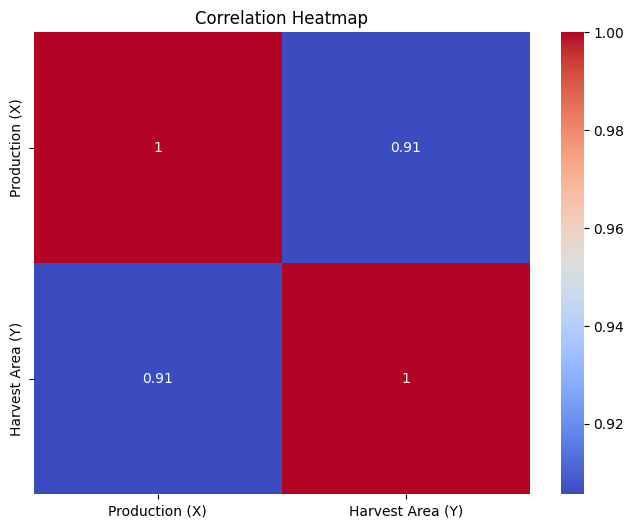

In [4]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Kode ini membuat visualisasi heatmap dari matriks korelasi yang dihitung pada blok sebelumnya menggunakan sns.heatmap(). Heatmap memperlihatkan korelasi dalam bentuk warna, yang memudahkan identifikasi hubungan antara variabel. Argumen annot=True menampilkan nilai korelasi langsung pada heatmap, sementara cmap='coolwarm' memberikan gradasi warna dari merah ke biru, menunjukkan korelasi negatif hingga positif.

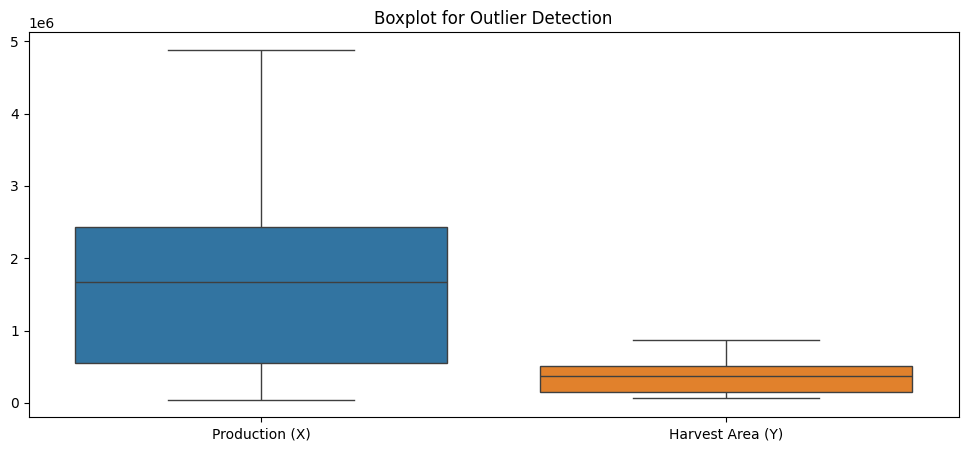

In [5]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=data)
plt.title("Boxplot for Outlier Detection")
plt.show()

Blok ini membuat visualisasi boxplot dari dataset menggunakan sns.boxplot(), yang berfungsi untuk mendeteksi outlier. Boxplot ini memberikan informasi tentang persebaran data dan nilai ekstrim pada setiap variabel dalam dataset. Judul "Boxplot for Outlier Detection" ditambahkan untuk memperjelas bahwa visualisasi ini bertujuan mengidentifikasi outlier yang bisa memengaruhi performa model.

In [6]:
z_scores = np.abs(stats.zscore(data))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers found: {outliers.sum()}")

Number of outliers found: 0


Kode ini menghitung nilai Z-score untuk setiap titik data dalam dataset dengan stats.zscore(data) dan mengidentifikasi outlier dengan menganggap nilai Z-score yang lebih besar dari 3 sebagai outlier. Variabel outliers adalah hasil logika True atau False yang menunjukkan posisi outlier pada dataset. Total outlier dihitung dengan outliers.sum() dan ditampilkan, sehingga pengguna dapat mengetahui jumlah data yang berpotensi berpengaruh negatif pada model.

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

Pada blok ini, data distandarisasi menggunakan StandardScaler. Objek scaler dipasangkan pada dataset, dan scaler.fit_transform() mengubah nilai setiap kolom agar memiliki distribusi standar (rata-rata 0 dan standar deviasi 1), yang membantu dalam menstabilkan model. Hasilnya dikonversi kembali ke DataFrame bernama scaled_df, sehingga data tetap mudah diakses dan dapat dilihat dalam format tabel.

In [8]:
X = scaled_df[['Production (X)']]
y = scaled_df['Harvest Area (Y)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=47)

Di sini, dataset dipisahkan menjadi fitur input X (kolom Production (X)) dan target output y (kolom Harvest Area (Y)). Data kemudian dibagi menjadi set data latih dan uji menggunakan train_test_split, dengan 10% data digunakan untuk pengujian dan 90% untuk pelatihan. Parameter random_state=47 memastikan bahwa pembagian data konsisten saat kode dijalankan ulang.

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Model regresi linear dibuat menggunakan LinearRegression(), lalu dilatih menggunakan data latih X_train dan y_train. model.fit(X_train, y_train) mengoptimalkan model agar dapat mengestimasi hubungan antara fitur dan target, yang memungkinkan model memprediksi nilai Harvest Area berdasarkan Production.

In [10]:
y_pred = model.predict(X_test)

Setelah model dilatih, prediksi dibuat pada data uji X_test menggunakan model.predict(X_test). Hasil prediksi disimpan di y_pred, yang kemudian akan digunakan dalam evaluasi model untuk mengetahui seberapa baik model mampu memprediksi data yang tidak dikenal.

In [11]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.037020317686727366
Mean Absolute Error (MAE): 0.1610726394353577
R-squared (R2): 0.9567991072237485


Blok ini mengevaluasi performa model menggunakan tiga metrik: Mean Squared Error (MSE), Mean Absolute Error (MAE), dan R-squared (R2). mse dan mae mengukur rata-rata perbedaan antara nilai prediksi dan nilai sebenarnya, sedangkan r2 menunjukkan proporsi variabilitas target yang berhasil dijelaskan oleh model. Hasil ketiga metrik ini dicetak untuk memberikan gambaran seberapa baik model bekerja.

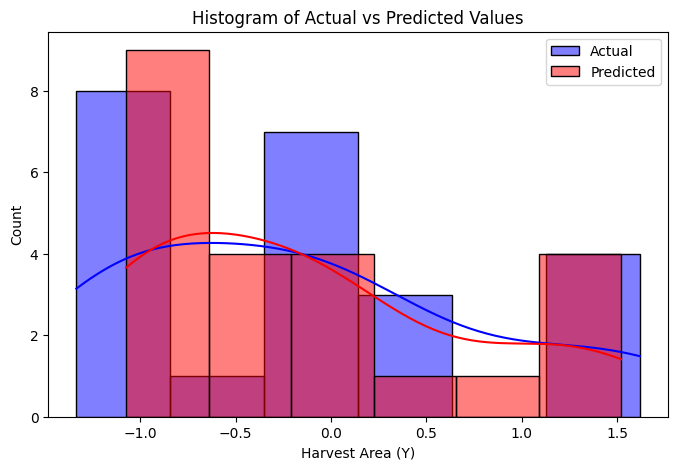

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(y_test, color="blue", label="Actual", kde=True)
sns.histplot(y_pred, color="red", label="Predicted", kde=True)
plt.legend()
plt.title("Histogram of Actual vs Predicted Values")
plt.show()

Histogram dari nilai aktual dan prediksi dibuat menggunakan sns.histplot() untuk mengevaluasi distribusi hasil prediksi. Warna biru mewakili nilai aktual, sedangkan warna merah menunjukkan prediksi. Grafik ini memberikan gambaran visual tentang perbandingan distribusi antara nilai yang diprediksi dan nilai aktual pada data uji, yang membantu dalam memeriksa akurasi model secara visual.

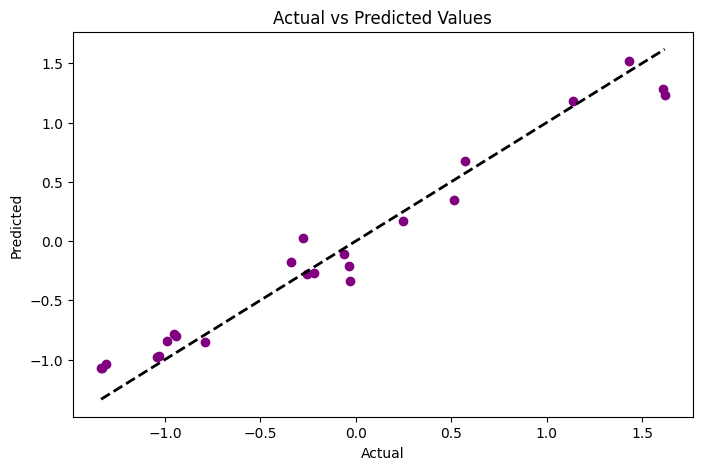

In [13]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.show()

Scatter plot ini menampilkan hubungan antara nilai aktual y_test dan prediksi y_pred. Garis y=x (warna hitam) ditambahkan sebagai acuan ideal di mana nilai prediksi sama dengan nilai aktual. Plot ini mempermudah dalam melihat penyebaran prediksi terhadap data sebenarnya, dan seberapa dekat model berhasil memprediksi data uji.

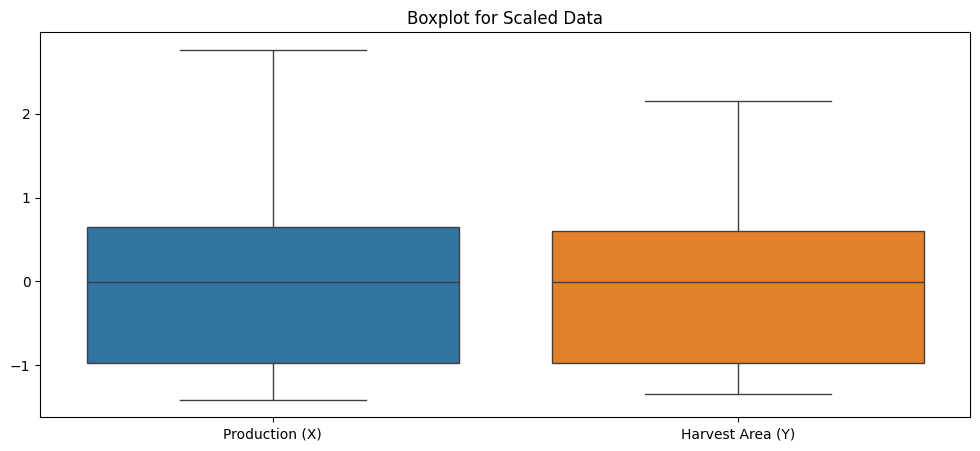

In [14]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=scaled_df)
plt.title("Boxplot for Scaled Data")
plt.show()

Blok terakhir menghasilkan boxplot dari data yang telah distandarisasi (scaled_df). Visualisasi ini membantu dalam mengecek apakah proses standarisasi telah berhasil meratakan persebaran data serta untuk melihat adanya outlier pada data yang sudah distandarisasi. Judul "Boxplot for Scaled Data" ditambahkan untuk memperjelas konteks visualisasi ini.

In [22]:
new_data = pd.DataFrame({'Production (X)': [1329536.00, 4090654.00]})

scaler = StandardScaler()
scaler.fit(X_train)

new_data_scaled = scaler.transform(new_data)

predicted_harvest_area = model.predict(new_data)

print("Prediksi Luas Area Panen:")
print(predicted_harvest_area)

Prediksi Luas Area Panen:
[1191839.49913898 3666995.8608396 ]


Hasil uji regresi menunjukan hasil yang hampir sesuai dengan modul yang diberikan